# Tutorial de solución de ecuaciones diferenciales con parámetros constantes
### Lourdes Martín-Aguilar & Marco Herrera Valdez
#### Facultad de Ciencias, Universidad Nacional Autónoma de México

Resolvamos un problema con valor inicial para una variable $x$ que depende de $t$ 
\begin{equation}
\partial_t x = \frac{a - x}{\tau}, \quad x(t_0) = 0 
\end{equation}
utilizando las rutinas de integración numérica del módulo _scipy_ de _python_. 

La solución analítica es de la forma
\begin{equation}
x(t) = a - \left( a - x_0 \right) \exp \left(-\frac{t}{\tau} \right) 
\end{equation}


### Definiciones de funciones y simulación numérica

El problema de valor inicial descrito arriba será resuelto mediante el uso de un iterador. Las herramientas necesarias para la integración numérica son parte del paquete _scipy_. La solución numérica y la analítica serán comparadas gráficamente. 

Primero importemos los módulos necesarios

In [1]:
import scipy as sc
import matplotlib.pylab as gr
from scipy.integrate import odeint
%matplotlib inline

El módulo scipy tiene herramientas para hacer cálculos numéricos, el módulo pylab de matplotlib continene herramientas para graficar arreglos, listas, y otros objetos de python. El comando _matplotlib inline_ instruye al kernel de jupyter (o ipython notebook) para que muestre las figuras dentro del documento.

Generemos un diccionario con los parámetros y arreglos necesarios para integrar la ecuación numéricamente.

In [4]:
p=dict()
p["a"]=100.0; p["tau"]=40.0; p["ic"]=260.2
p["timeMax"]=300.0; p["timeStep"]=0.1;
p["sampTimes"]= sc.arange(0,p["timeMax"],p["timeStep"])
print(p.keys())
print(p["sampTimes"])

dict_keys(['timeMax', 'ic', 'tau', 'a', 'sampTimes', 'timeStep'])
[  0.00000000e+00   1.00000000e-01   2.00000000e-01 ...,   2.99700000e+02
   2.99800000e+02   2.99900000e+02]


Definamos una función para que python la integre numéricamente

In [6]:
def linearEq(u,t,p):
    du = (p["a"]-u)/p["tau"]
    return du

y otra función para la solución analítica

In [7]:
f= lambda t,p: p["a"] - (p["a"]-p["ic"])*sc.exp(-t/p["tau"])

Ahora iteremos la función usando la función _integrate.odeint_ de scipy. 

In [8]:
uSol= odeint(func=linearEq, y0=p["ic"], t=p["sampTimes"],args=(p,)).transpose()

El integrador da una solución en forma de un arreglo de $m \times n$ donde $m$ es el número de puntos en el eje temporal considerados para la integración y $n$ es el número de variables de estado a integrar; en este caso sólo una. La transposición hace más fácil extraer las soluciones para las distintas variables de estado usando un sólo índice. 

Grafica la solución $y(t)$ y compara contra la solución numérica $u(t)$ y un acercamiento

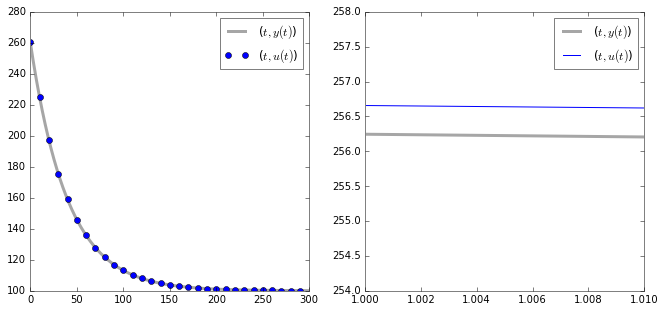

In [9]:
tt = sc.arange(0,p["timeMax"],p["timeStep"]*p["timeMax"]/3.0)
fig=gr.figure(figsize=(11,5))
rows=1; cols=2
ax1=fig.add_subplot(rows,cols,1)
ax2=fig.add_subplot(rows,cols,2)
ax1.plot(p["sampTimes"], uSol[0],'k',lw=3, alpha=0.35, label=r'($t,y(t)$)')
ax1.plot(tt,f(tt,p),'bo',label=r'($t,u(t)$)')
ax2.plot(p["sampTimes"], uSol[0],'k', lw=3, alpha=0.35, label=r'($t,y(t)$)')
ax2.plot(tt,f(tt,p),'b',label=r'($t,u(t)$)')
ax2.set_xlim(1,1.01); ax2.set_ylim(254,258)
ax1.legend(); ax2.legend()